# Exploratory Data analysis , Data cleaning , Data Visualization 

In [ ]:
import pandas as pd
import csv
# Importing libraries.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from sklearn.preprocessing import OneHotEncoder
import scipy as sp


In [2]:
#import the dataset
df=pd.read_csv("train.csv")

In [3]:
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [4]:
df.shape


(37500, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

In [6]:
df.count()

index                37500
beer/ABV             37500
beer/beerId          37500
beer/brewerId        37500
beer/name            37500
beer/style           37500
review/appearance    37500
review/aroma         37500
review/overall       37500
review/palate        37500
review/taste         37500
review/text          37490
review/timeStruct    37500
review/timeUnix      37500
user/ageInSeconds     7856
user/birthdayRaw      7856
user/birthdayUnix     7856
user/gender          15314
user/profileName     37495
dtype: int64

### The dataset now contains a mix of numeric and categorical variables.

In [7]:
# Types of data
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

# Examine structure 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   index              37500 non-null  int64   
 1   beer/ABV           37500 non-null  float64 
 2   beer/beerId        37500 non-null  int64   
 3   beer/brewerId      37500 non-null  int64   
 4   beer/name          37500 non-null  category
 5   beer/style         37500 non-null  category
 6   review/appearance  37500 non-null  float64 
 7   review/aroma       37500 non-null  float64 
 8   review/overall     37500 non-null  float64 
 9   review/palate      37500 non-null  float64 
 10  review/taste       37500 non-null  float64 
 11  review/text        37490 non-null  category
 12  review/timeStruct  37500 non-null  category
 13  review/timeUnix    37500 non-null  int64   
 14  user/ageInSeconds  7856 non-null   float64 
 15  user/birthdayRaw   7856 non-null   category
 16  user

### DATA CLEANING

1. Missing data
2. Duplicate data
3. Unsuitable data

1. Missing data

In [8]:
# Check for null values
print(df.isnull().sum())

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64


In [9]:
# Drop null row values
df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7709 entries, 3 to 37492
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   index              7709 non-null   int64   
 1   beer/ABV           7709 non-null   float64 
 2   beer/beerId        7709 non-null   int64   
 3   beer/brewerId      7709 non-null   int64   
 4   beer/name          7709 non-null   category
 5   beer/style         7709 non-null   category
 6   review/appearance  7709 non-null   float64 
 7   review/aroma       7709 non-null   float64 
 8   review/overall     7709 non-null   float64 
 9   review/palate      7709 non-null   float64 
 10  review/taste       7709 non-null   float64 
 11  review/text        7709 non-null   category
 12  review/timeStruct  7709 non-null   category
 13  review/timeUnix    7709 non-null   int64   
 14  user/ageInSeconds  7709 non-null   float64 
 15  user/birthdayRaw   7709 non-null   category
 16  user/

In [10]:
# Check for null values
print(df.isnull().sum())

index                0
beer/ABV             0
beer/beerId          0
beer/brewerId        0
beer/name            0
beer/style           0
review/appearance    0
review/aroma         0
review/overall       0
review/palate        0
review/taste         0
review/text          0
review/timeStruct    0
review/timeUnix      0
user/ageInSeconds    0
user/birthdayRaw     0
user/birthdayUnix    0
user/gender          0
user/profileName     0
dtype: int64


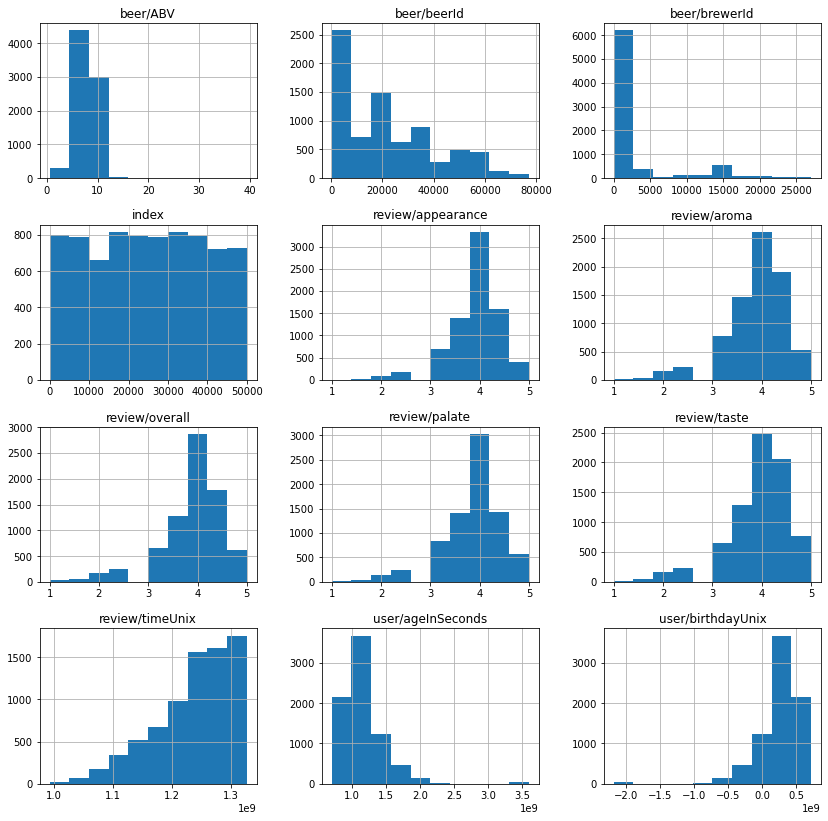

In [11]:
import matplotlib.pyplot as plt

df.hist(figsize=(14,14))

plt.show()

2. Duplicate Data : If a user has rated the same beer more than once, then only keep their highest rating.

In [12]:
df = df.sort_values("review/overall",ascending=False)
df = df.drop_duplicates(subset = ['user/profileName','beer/beerId'],keep='first')
df = df.drop_duplicates(subset = ['user/profileName','beer/name'],keep='first')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7657 entries, 18824 to 11836
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   index              7657 non-null   int64   
 1   beer/ABV           7657 non-null   float64 
 2   beer/beerId        7657 non-null   int64   
 3   beer/brewerId      7657 non-null   int64   
 4   beer/name          7657 non-null   category
 5   beer/style         7657 non-null   category
 6   review/appearance  7657 non-null   float64 
 7   review/aroma       7657 non-null   float64 
 8   review/overall     7657 non-null   float64 
 9   review/palate      7657 non-null   float64 
 10  review/taste       7657 non-null   float64 
 11  review/text        7657 non-null   category
 12  review/timeStruct  7657 non-null   category
 13  review/timeUnix    7657 non-null   int64   
 14  user/ageInSeconds  7657 non-null   float64 
 15  user/birthdayRaw   7657 non-null   category
 16  u

In [14]:
round(df.describe(),2)  #Upto 2 decimal places

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,7657.00,7657.00,7657.00,7657.00,7657.00,7657.00,7657.00,7657.00,7657.00,7.657000e+03,7.657000e+03,7.657000e+03
mean,24834.81,7.47,21874.32,3073.65,3.91,3.90,3.91,3.87,3.95,1.236717e+09,1.167129e+09,2.512066e+08
std,14378.74,2.31,18555.70,5189.05,0.59,0.67,0.70,0.67,0.71,6.562689e+07,3.077347e+08,3.077347e+08
min,4.00,0.50,175.00,1.00,1.00,1.00,1.00,1.00,1.00,9.932515e+08,7.034366e+08,-2.176387e+09
25%,12308.00,5.50,5441.00,395.00,3.50,3.50,3.50,3.50,3.50,1.198126e+09,9.779258e+08,1.443132e+08
50%,24928.00,7.00,19960.00,1199.00,4.00,4.00,4.00,4.00,4.00,1.248134e+09,1.096639e+09,3.216960e+08
75%,36950.00,9.40,34146.00,1315.00,4.50,4.50,4.50,4.50,4.50,1.289368e+09,1.274022e+09,4.404096e+08
max,49974.00,39.44,77207.00,26990.00,5.00,5.00,5.00,5.00,5.00,1.326257e+09,3.594723e+09,7.148988e+08


3. Removing Outliers :The rating score should be scaled between 1 to 5,however,in the data frame described above, we can find that there are reviews with a score below 1 in the column review_overall and review_apperance. Therefore, we should remove the outliers.



In [15]:
df = df.loc[(df["review/overall"]>=1) & (df["review/appearance"]>=1)]

df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
18824,32762,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.5,5.0,5.0,4.5,5.0,On tap @ TPH 5/24/06. Huge thanks on this one....,"{'min': 18, 'hour': 6, 'mday': 24, 'sec': 38, ...",1148451518,9.583166e+08,"Jul 30, 1984",460018800.0,Male,bignick
4590,20871,8.3,11757,1199,Founders Breakfast Stout,American Double / Imperial Stout,5.0,5.0,5.0,4.5,5.0,"Unbelievable on tap, first time I've ever seen...","{'min': 27, 'hour': 7, 'mday': 22, 'sec': 28, ...",1227338848,8.907518e+08,"Sep 20, 1986",527583600.0,Male,kiddynamite920
4441,5184,9.4,33644,14879,B.O.R.I.S. The Crusher Oatmeal-Imperial Stout,Russian Imperial Stout,4.5,4.5,5.0,4.0,4.5,Picked this badboy up at Jungle's in Fairlfiel...,"{'min': 5, 'hour': 3, 'mday': 5, 'sec': 6, 'ye...",1225854306,1.256739e+09,"Feb 14, 1975",161596800.0,Male,beachbum1975
30630,4948,9.4,33644,14879,B.O.R.I.S. The Crusher Oatmeal-Imperial Stout,Russian Imperial Stout,4.5,4.5,5.0,4.5,4.5,A/dark choclate like\t\tS/ it smells like whis...,"{'min': 22, 'hour': 17, 'mday': 27, 'sec': 5, ...",1261934525,1.426777e+09,"Sep 25, 1969",-8442000.0,Male,redsonja
30647,33375,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.5,5.0,5.0,4.5,5.0,"2010 release, poured into a glass.\tAppearance...","{'min': 12, 'hour': 4, 'mday': 6, 'sec': 55, '...",1283746375,1.118157e+09,"Jul 7, 1979",300178800.0,Male,phillybeer7779


In [16]:
round(df.describe(),2)

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,7657.00,7657.00,7657.00,7657.00,7657.00,7657.00,7657.00,7657.00,7657.00,7.657000e+03,7.657000e+03,7.657000e+03
mean,24834.81,7.47,21874.32,3073.65,3.91,3.90,3.91,3.87,3.95,1.236717e+09,1.167129e+09,2.512066e+08
std,14378.74,2.31,18555.70,5189.05,0.59,0.67,0.70,0.67,0.71,6.562689e+07,3.077347e+08,3.077347e+08
min,4.00,0.50,175.00,1.00,1.00,1.00,1.00,1.00,1.00,9.932515e+08,7.034366e+08,-2.176387e+09
25%,12308.00,5.50,5441.00,395.00,3.50,3.50,3.50,3.50,3.50,1.198126e+09,9.779258e+08,1.443132e+08
50%,24928.00,7.00,19960.00,1199.00,4.00,4.00,4.00,4.00,4.00,1.248134e+09,1.096639e+09,3.216960e+08
75%,36950.00,9.40,34146.00,1315.00,4.50,4.50,4.50,4.50,4.50,1.289368e+09,1.274022e+09,4.404096e+08
max,49974.00,39.44,77207.00,26990.00,5.00,5.00,5.00,5.00,5.00,1.326257e+09,3.594723e+09,7.148988e+08


In [17]:
df["review/timeUnix"] = pd.to_datetime (df["review/timeUnix"],unit = 's')

In [18]:
df.dtypes

index                         int64
beer/ABV                    float64
beer/beerId                   int64
beer/brewerId                 int64
beer/name                  category
beer/style                 category
review/appearance           float64
review/aroma                float64
review/overall              float64
review/palate               float64
review/taste                float64
review/text                category
review/timeStruct          category
review/timeUnix      datetime64[ns]
user/ageInSeconds           float64
user/birthdayRaw           category
user/birthdayUnix           float64
user/gender                category
user/profileName           category
dtype: object

In [19]:
df.drop(['user/birthdayRaw', 'user/birthdayUnix', 'review/timeStruct', 'user/profileName','user/gender','user/ageInSeconds','index'], axis=1, inplace=True)
df.head()

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeUnix
18824,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.5,5.0,5.0,4.5,5.0,On tap @ TPH 5/24/06. Huge thanks on this one....,2006-05-24 06:18:38
4590,8.3,11757,1199,Founders Breakfast Stout,American Double / Imperial Stout,5.0,5.0,5.0,4.5,5.0,"Unbelievable on tap, first time I've ever seen...",2008-11-22 07:27:28
4441,9.4,33644,14879,B.O.R.I.S. The Crusher Oatmeal-Imperial Stout,Russian Imperial Stout,4.5,4.5,5.0,4.0,4.5,Picked this badboy up at Jungle's in Fairlfiel...,2008-11-05 03:05:06
30630,9.4,33644,14879,B.O.R.I.S. The Crusher Oatmeal-Imperial Stout,Russian Imperial Stout,4.5,4.5,5.0,4.5,4.5,A/dark choclate like\t\tS/ it smells like whis...,2009-12-27 17:22:05
30647,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.5,5.0,5.0,4.5,5.0,"2010 release, poured into a glass.\tAppearance...",2010-09-06 04:12:55


In [20]:
df.drop(['review/timeUnix'], axis=1, inplace=True)
df.head()

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text
18824,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.5,5.0,5.0,4.5,5.0,On tap @ TPH 5/24/06. Huge thanks on this one....
4590,8.3,11757,1199,Founders Breakfast Stout,American Double / Imperial Stout,5.0,5.0,5.0,4.5,5.0,"Unbelievable on tap, first time I've ever seen..."
4441,9.4,33644,14879,B.O.R.I.S. The Crusher Oatmeal-Imperial Stout,Russian Imperial Stout,4.5,4.5,5.0,4.0,4.5,Picked this badboy up at Jungle's in Fairlfiel...
30630,9.4,33644,14879,B.O.R.I.S. The Crusher Oatmeal-Imperial Stout,Russian Imperial Stout,4.5,4.5,5.0,4.5,4.5,A/dark choclate like\t\tS/ it smells like whis...
30647,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.5,5.0,5.0,4.5,5.0,"2010 release, poured into a glass.\tAppearance..."


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7657 entries, 18824 to 11836
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   beer/ABV           7657 non-null   float64 
 1   beer/beerId        7657 non-null   int64   
 2   beer/brewerId      7657 non-null   int64   
 3   beer/name          7657 non-null   category
 4   beer/style         7657 non-null   category
 5   review/appearance  7657 non-null   float64 
 6   review/aroma       7657 non-null   float64 
 7   review/overall     7657 non-null   float64 
 8   review/palate      7657 non-null   float64 
 9   review/taste       7657 non-null   float64 
 10  review/text        7657 non-null   category
dtypes: category(3), float64(6), int64(2)
memory usage: 2.2 MB


# Question-Answers & Data Visualization

### q1.  How does beer style and taste rating is correlated to overall rating

In [68]:
beer_style_taste_abv = df.loc[:,['beer/style','review/taste','review/overall','beer/ABV']]

beer_style_taste_abv = beer_style_taste_abv.groupby('beer/style')['review/taste','review/overall','beer/ABV'].mean()

beer_style_taste_abv = pd.DataFrame(data=beer_style_taste_abv)

beer_style_taste_abv = beer_style_taste_abv.sort_values(by=['review/taste'],ascending=False).reset_index()

beer_style_taste_abv

,beer/style,review/taste,review/overall,beer/ABV
0,American Double / Imperial Stout,4.522490,4.360879,9.553766
1,English Dark Mild Ale,4.500000,4.500000,3.000000
2,Chile Beer,4.500000,4.000000,4.400000
3,English Barleywine,4.392857,4.285714,10.475000
4,American Wild Ale,4.350000,4.050000,9.155000
...,...,...,...,...
90,Flanders Oud Bruin,NaN,NaN,NaN
91,Flanders Red Ale,NaN,NaN,NaN
92,Lambic - Fruit,NaN,NaN,NaN
93,Lambic - Unblended,NaN,NaN,NaN


In [69]:
import plotly.express as px

import statsmodels

fig = px.scatter(beer_style_taste_abv,x="review/overall",y="review/taste",trendline="ols")

fig.show()


### q2 How does beer alcohol content correlated to overall rating 

In [70]:
fig = px.scatter(beer_style_taste_abv,x="review/overall",y="beer/ABV",trendline="ols")

fig.show()

### q3 How does beer style distributed across taste and rating 

In [73]:
fig = px.scatter(beer_style_taste_abv,x="review/overall",y="review/taste",color='beer/style')

fig.show()

### q4 Beer ABV distribution per style?

In [74]:
fig = px.scatter(beer_style_taste_abv,x="beer/style",y="beer/ABV")

fig.show()

### q4  Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?

1. Using correlation

In [77]:
# Method 1 - Heatmap: Pandas
# List of numeric factors to include
factors = ["review/appearance","review/aroma","review/palate","review/taste", "review/overall","beer/style","beer/ABV"]

# Create a correlation matrix 
corr_metrics = df[factors].corr()
corr_metrics.style.background_gradient(cmap='Blues')

,review/appearance,review/aroma,review/palate,review/taste,review/overall,beer/ABV
review/appearance,1.000000,0.523297,0.538732,0.510861,0.466908,0.300919
review/aroma,0.523297,1.000000,0.593280,0.700917,0.596534,0.397609
review/palate,0.538732,0.593280,1.000000,0.714207,0.676875,0.367953
review/taste,0.510861,0.700917,0.714207,1.000000,0.770479,0.367809
review/overall,0.466908,0.596534,0.676875,0.770479,1.000000,0.201382
beer/ABV,0.300919,0.397609,0.367953,0.367809,0.201382,1.000000


In [78]:

import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
pd.options.display.max_columns = None

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Set1")

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


In [79]:
#Method 2 - Heatmap: Plotly
heat_map_plotly = ff.create_annotated_heatmap(
    z=corr_metrics.values,
    x=list(corr_metrics.columns),
    y=list(corr_metrics.index),
    annotation_text=corr_metrics.round(2).values,
    showscale=True,
    colorscale='Portland',
    font_colors=['white','white'])

layout = go.Layout(title="Correlation Heatmap",
                   margin = dict(l = 330))

fig = go.Figure(data=heat_map_plotly, layout=layout)
py.offline.iplot(fig)

In [80]:
# Correlation with target review_overall
factor_corr = corr_metrics[['review/overall']]\
    .drop(['review/overall'])\
    .reset_index()\
    .sort_values('review/overall', ascending=True)

# Plot it with Plotly
p4 = [go.Bar(x = factor_corr['review/overall'],
            y = factor_corr['index'],
            hoverinfo='x',
            text=factor_corr['review/overall'].round(2),
            textposition = 'inside',
            orientation = 'h',
            opacity=0.7, 
            marker=dict(
                color='rgb(1, 87, 155)'))]

# Pieces of Flair
layout = go.Layout(title='Correlation with Target: review_overall',
                   xaxis=dict(title="Correlation",
                              hoverformat = '.2f'),
                   margin = dict(l = 130),
                   font=dict(family='Courier New, monospace',
                            color='dark gray'))

fig = go.Figure(data=p4, layout=layout)

# Plot it
py.offline.iplot(fig)
0.5
0.61
0.7


0.7

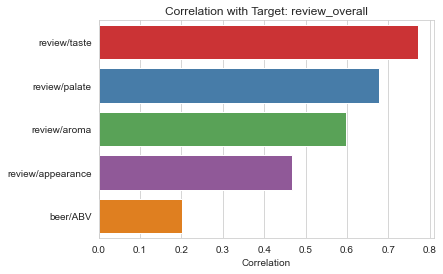

<Figure size 864x576 with 0 Axes>

In [81]:
#  Bar Chart: Seaborn
sns.barplot(data=factor_corr.sort_values('review/overall', ascending=False), y="index",x="review/overall")
plt.ylabel(""); plt.xlabel("Correlation")
plt.title("Correlation with Target: review_overall")
plt.figure(figsize=(12,8))
plt.show()

## There is high correlation between review_taste and the target variable review_overall.

## others Questions can be answer based on the data analysis done below

In [82]:
# Count of unique breweries
print( 'Unique breweries' )
print("by id :", len(df['beer/brewerId'].unique()))
print("by name:", len(df['beer/name'].unique()))
#df[ ' beer/name ' ].unique()

#df['file_name'].unique())

Unique breweries
by id : 135
by name: 764


In [83]:
# Count of unique beers => Integrity issues evidenced => Id is not considered for subsequent analysis
print( 'Unique beers' )
print( 'By id:', len(df['beer/beerId' ].unique()))
print( 'By name:', len(df['beer/name'].unique()))

Unique beers
By id: 778
By name: 764


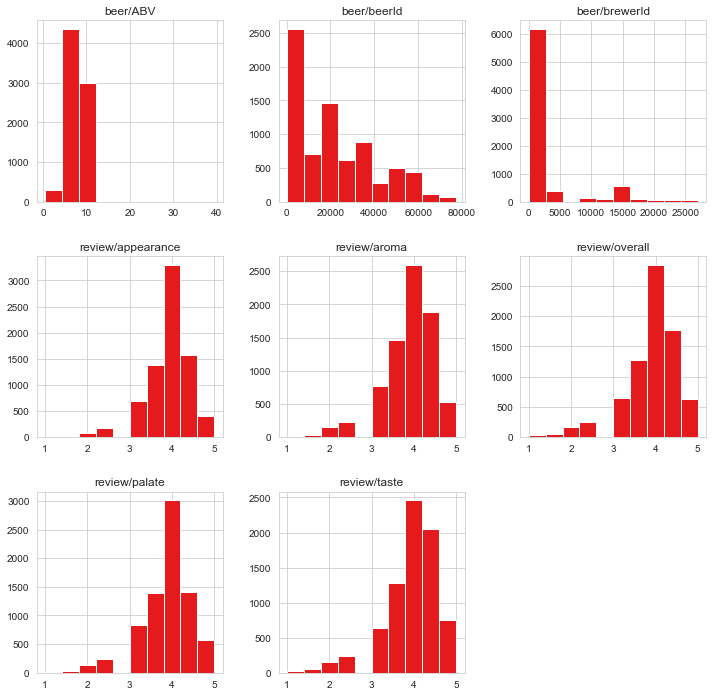

In [84]:
# Histogram of all numeric features
df.hist(figsize=(12,12))
plt.show()

# Top 10 popular breweries

In [85]:
# pip install plotly==4.8.1

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff

In [87]:
bar = go.Bar(x=df["beer/brewerId"].value_counts().head(10).sort_values(ascending=True),y=df["review/overall"].value_counts().head(10).sort_values(ascending=True).index,
             hoverinfo = 'x',text=df["beer/brewerId"].value_counts().head(10).sort_values(ascending=True).index,textposition = 'inside',orientation = 'h',opacity=0.75, 
             marker=dict(color='rgb(1, 77, 102)'))

layout = go.Layout(title='The Top 10 popular breweries',
                   xaxis=dict(title="Count of breweries",), yaxis=dict(title="Overall Rating"),
                   margin = dict(l = 220),
                   font=dict(family='Comic Sans MS',
                            color='dark gray'))

fig = go.Figure(data=bar, layout=layout)

# Plot it
plotly.offline.iplot(fig)
                    


###  Feature Selection On the basis of correlation 

##### correlation between the independent variables which are the 'review/overall', 'review/aroma', 'review/appearance', 'review/palate', 'review/taste', 'beer/ABV'
##### finding the least and highy correlated through correlation Matrix

Text(0.5, 1.0, 'Pearson Correlation')

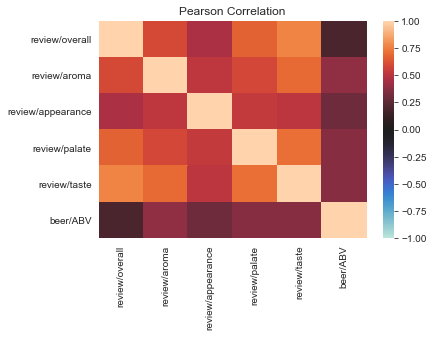

In [88]:
# heat Map for corelation Matrix
sns.heatmap(df[[ 'review/overall', 'review/aroma', 'review/appearance', 'review/palate', 'review/taste', 'beer/ABV',]].corr(), center = 0,  vmin = -1, vmax = 1 )
plt.title( 'Pearson Correlation' )

### Which of the factors (aroma, taste, appearance, palate) are most important in determining the overall quality of a beer?

##### In terms of correlation (pearson or spearman), the ranking seems to be: beer/ABV,taste, palate, aroma, appearance , overall

In [89]:
#pip install pandas_profiling

In [90]:
import pandas_profiling
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [91]:
# Defining the linear model
linear_model = LinearRegression( normalize = True )

In [92]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os

In [93]:
# Training and generating predictions for the model
linear_model.fit( X = df[ [ 'review/aroma', 'review/appearance', 'review/palate', 'review/taste' ] ], y = df[ 'review/overall' ] )
preds = linear_model.predict(df[ [ 'review/aroma', 'review/appearance', 'review/palate', 'review/taste' ] ] )

In [94]:
# Coeffifients for each feature (aroma, appearance, palate, taste)
linear_model.coef_

array([0.06046034, 0.03611679, 0.24751191, 0.53425281])

In [95]:
#Validating the error in the model
# Apparently, a linear model is enough to represent the phenomenon evidencing a global error of 0.42 when the range of possible values for the target is betwenn 0 and 5
# Most sophisitcated validation schemas must be developed
np.sqrt( mean_squared_error(df[ 'review/overall' ], preds ) )

0.4258088878753853

### Similar to results by correlation, the coefficients contributing more information to the model are the corresponding to taste and aroma features.

#### TO  enjoy a beer due to its aroma and appearance, which beer style should I try?

In [96]:
df.sort_values( by = [ 'review/aroma', 'review/appearance' ], ascending = False ).head( 10 ) [ 'beer/style' ].unique().tolist()


['American Double / Imperial Stout',
 'Russian Imperial Stout',
 'American Porter',
 'Belgian Strong Pale Ale',
 'Rauchbier',
 'American Double / Imperial IPA']

In [97]:
df["beer/beerId"].value_counts()

11757    402
19960    313
16074    225
5441     223
7463     209
        ... 
37559      1
62717      1
53959      1
53523      1
59986      1
Name: beer/beerId, Length: 778, dtype: int64

In [98]:
# No of ratings given by users
df["review/overall"].value_counts()

4.0    2850
4.5    1774
3.5    1272
3.0     651
5.0     625
2.5     246
2.0     162
1.5      47
1.0      30
Name: review/overall, dtype: int64

In [99]:
# No of beers of each style

df["beer/style"].value_counts()

American Double / Imperial Stout    956
American IPA                        645
American Double / Imperial IPA      640
Scotch Ale / Wee Heavy              458
Russian Imperial Stout              419
                                   ... 
Berliner Weissbier                    0
Flanders Oud Bruin                    0
Lambic - Fruit                        0
Weizenbock                            0
Lambic - Unblended                    0
Name: beer/style, Length: 95, dtype: int64

In [100]:
# Based on overall rating 
df.groupby('review/overall').mean()



,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/palate,review/taste
review/overall,,,,,,,
1.0,6.256667,20770.500000,3101.400000,3.000000,2.116667,2.050000,1.566667
1.5,6.370213,20892.744681,3515.276596,2.882979,2.382979,2.287234,1.840426
2.0,6.369568,25498.179012,4347.061728,3.157407,2.750000,2.580247,2.305556
2.5,6.775203,21790.406504,3814.817073,3.367886,3.105691,2.863821,2.804878
3.0,6.813702,23170.712750,3878.032258,3.537634,3.360983,3.281874,3.208909
3.5,7.076376,22017.024371,3179.939465,3.755110,3.670991,3.615566,3.667060
4.0,7.476895,21767.799649,3137.583860,3.944035,3.971228,3.942281,4.065263
4.5,7.866466,21161.154453,2622.798760,4.131623,4.214487,4.225197,4.388388
5.0,8.443104,21964.057600,2351.353600,4.379200,4.484000,4.551200,4.706400
